# Tratamento e Análise dados Betfair

In [10]:
#IMPORTANDO AS BIBLIOTECAS NECESSÃRIAS
import pandas as pd

In [11]:
# CARREGANDO DATA DO CSV
df_bf = pd.read_csv('dados/jogos_BetFair.csv', on_bad_lines='skip') # PULA LINHAS MAL FORMATADAS

In [13]:
df_bf

,75′,1,0,SUSPENSO,6.0,1.1,SUSPENSO.1,1.02,10.0,100.0,Manchester United,Nottm Forest
0,72′,0,2.00,1.68,2.1,25.0,7.5,1.1,Roma,US Cremonese,NaN,NaN
1,27′,3,0.00,100.00,250.0,Sport Recife,Afogados Ingazeira,NaN,NaN,NaN,NaN,NaN
2,16′,1,0.00,1.52,2.4,1.28,4.75,10.0,Sporting CP,Braga,NaN,NaN
3,74′,0,2.00,1.90,1.82,250.0,70.0,1.001,Montpellier,PSG,NaN,NaN
4,75′,2,1.00,1.10,8.0,50.0,Não sera,Monaco,Auxerre,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
471,03 fev 20:00,2.05,1.68,1.65,3.5,4.75,Será Disponibilizado Ao Vivo,Tigre,Rosario Central,NaN,NaN,NaN
472,03 fev 20:00,2.2,1.55,2.80,2.9,2.3,Será Disponibilizado Ao Vivo,Tapatio,Celaya,NaN,NaN,NaN
473,03 fev 20:00,2.5,1.45,2.30,2.9,3.0,Será Disponibilizado Ao Vivo,Newells,Velez Sarsfield,NaN,NaN,NaN
474,03 fev 20:30,1.55,2.20,2.30,3.5,2.5,Será Disponibilizado Ao Vivo,Santos De Guapiles,Municipal Grecia,NaN,NaN,NaN


## Tratamento dos dados
- Renomear as colunas
- Eliminar colunas inuteis
- Tratamento dos nulos
- Ajuste dos tipos

In [14]:
#  hora|   +2,5   | -2,5 | casag| empate| vis_g  |        ao vivo             | casa    | visita
# 20:00,   2.0,    1.68,   10.0,  4.75   , 1.24,  Será Disponibilizado Ao Vivo,Esportivo,Grêmio,,,
# Renomeando as colunas
df_bf.columns = ['data/hora', 'maisq25', 'menosq25',
                 'casa_ganha', 'empate', 'visitante_ganha',
                 'ao_vivo', 'time_casa', 'time_visitante','x', 'xx', 'xxx'] #não importa o nome pq eu vou apagar

In [15]:
df_bf.head(6)

,data/hora,maisq25,menosq25,casa_ganha,empate,visitante_ganha,ao_vivo,time_casa,time_visitante,x,xx,xxx
0,72′,0,2.0,1.68,2.1,25.0,7.5,1.1,Roma,US Cremonese,NaN,NaN
1,27′,3,0.0,100.00,250.0,Sport Recife,Afogados Ingazeira,NaN,NaN,NaN,NaN,NaN
2,16′,1,0.0,1.52,2.4,1.28,4.75,10.0,Sporting CP,Braga,NaN,NaN
3,74′,0,2.0,1.90,1.82,250.0,70.0,1.001,Montpellier,PSG,NaN,NaN
4,75′,2,1.0,1.10,8.0,50.0,Não sera,Monaco,Auxerre,NaN,NaN,NaN
5,77′,0,0.0,16.00,2.8,1.6,10.0,Lyon,Brest,NaN,NaN,NaN


In [16]:
# Eliminando as colunas inuteis
df_bf.drop(['x', 'xx', 'xxx', 'ao_vivo'], axis='columns', inplace=True)

In [17]:
df_bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data/hora        476 non-null    object 
 1   maisq25          476 non-null    object 
 2   menosq25         476 non-null    float64
 3   casa_ganha       476 non-null    float64
 4   empate           476 non-null    object 
 5   visitante_ganha  476 non-null    object 
 6   time_casa        432 non-null    object 
 7   time_visitante   432 non-null    object 
dtypes: float64(2), object(6)
memory usage: 29.9+ KB


In [18]:
# Tratando os nulos
# REMOVENDO TODAS AS COLUNAS QUE POSSUEM APENAS VALORES NULOS
df_semNulo = df_bf.dropna(how = 'all',axis='rows') # type: ignore

In [19]:
df_semNulo.head(6)

,data/hora,maisq25,menosq25,casa_ganha,empate,visitante_ganha,time_casa,time_visitante
0,72′,0,2.0,1.68,2.1,25.0,1.1,Roma
1,27′,3,0.0,100.00,250.0,Sport Recife,NaN,NaN
2,16′,1,0.0,1.52,2.4,1.28,10.0,Sporting CP
3,74′,0,2.0,1.90,1.82,250.0,1.001,Montpellier
4,75′,2,1.0,1.10,8.0,50.0,Monaco,Auxerre
5,77′,0,0.0,16.00,2.8,1.6,Lyon,Brest


In [20]:
df_semNulo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data/hora        476 non-null    object 
 1   maisq25          476 non-null    object 
 2   menosq25         476 non-null    float64
 3   casa_ganha       476 non-null    float64
 4   empate           476 non-null    object 
 5   visitante_ganha  476 non-null    object 
 6   time_casa        432 non-null    object 
 7   time_visitante   432 non-null    object 
dtypes: float64(2), object(6)
memory usage: 29.9+ KB


In [21]:
df_semNulo['data'] = pd.to_datetime(df_semNulo['data'], format='%d/%m')

KeyError: 'data'

In [ ]:
df_semNulo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             298 non-null    datetime64[ns]
 1   hora             298 non-null    object        
 2   time_casa        298 non-null    object        
 3   time_visitante   298 non-null    object        
 4   casa_ganha       298 non-null    float64       
 5   empate           298 non-null    float64       
 6   visitante_ganha  298 non-null    float64       
 7   maisq            293 non-null    float64       
 8   menosq           293 non-null    float64       
 9   simodd           282 non-null    float64       
 10  nãoodd           282 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 27.9+ KB


## Analise dos dados
- Buscando outliers
- Verificando as distribuições
- Buscar relações entre variaveis

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

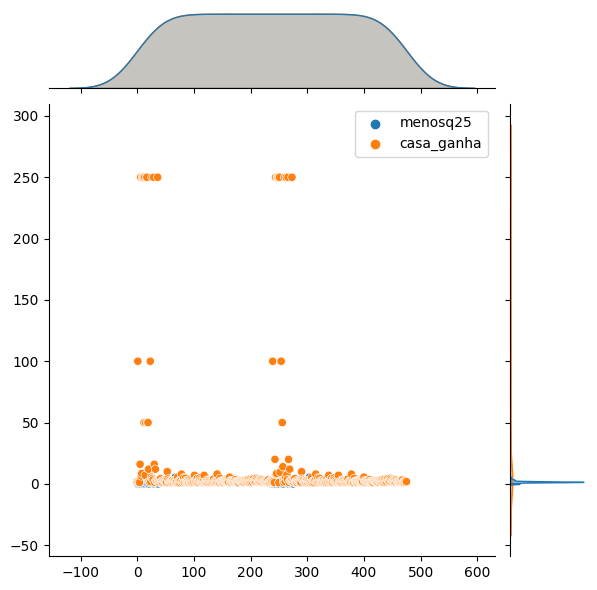

In [23]:
sns.jointplot(data=df_semNulo)

<AxesSubplot: >

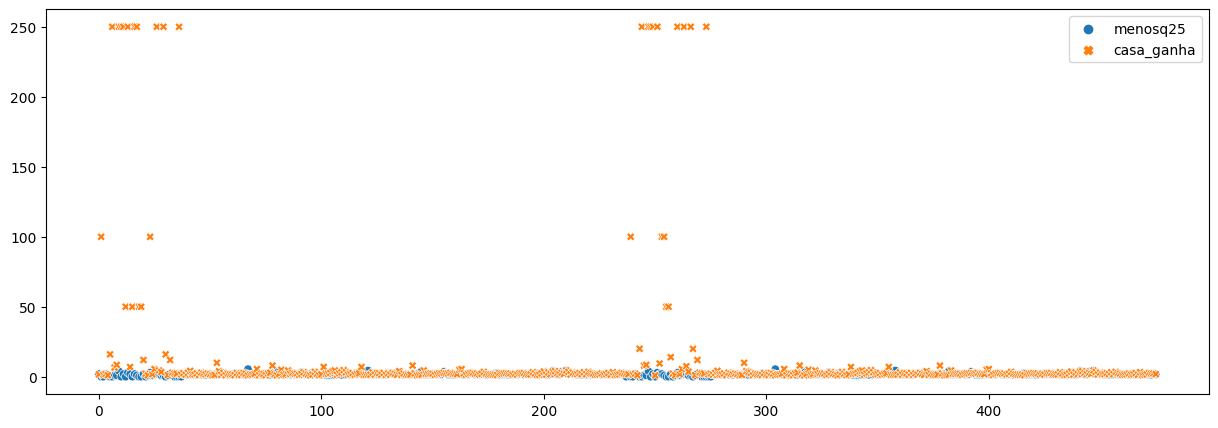

In [24]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_semNulo)

<AxesSubplot: >

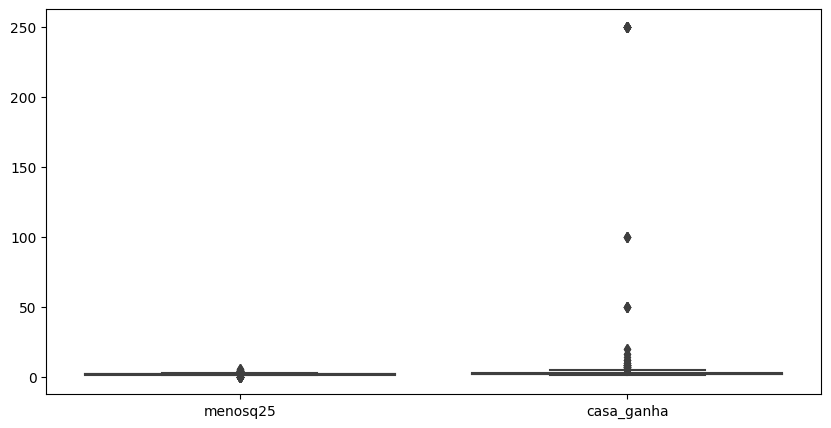

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_semNulo)

Existem muitos outliers, esses representam valores onde as odds foram muito altas (além do "normal")
Vamos analisar primeiro se essas odds podem atrapalhar no surebet e caso ocorro vamos remover

In [26]:
# Por fim salvando o dataset
df_semNulo.to_csv('dados/dados tratados/jogos_betfair_tratado.csv')